In [37]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val

data = pd.read_csv("./histogram/6-points.csv")
data_4 = pd.read_csv("./histogram/4-points.csv")
# data3 = pd.read_csv("./histogram/linear.csv")
data_lh = pd.read_csv("./histogram/lhapdf_3d.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
# data['linear_interpolator'] = data3['xf']
# data_edge = pd.read_csv("./histogram/slope-edge.csv")
data_avg = pd.read_csv("./histogram/avg_slope_inter.csv")
# data_mini_spline = pd.read_csv("./histogram/slope_zero.csv")
# data['edge_slope_interpolator'] = data_edge['xf']
data['avg_slope_interpolator'] = data_avg['xf']
# data['mini_spline_interpolator'] = data_mini_spline['xf']
data['lhapdf'] = data_lh['xf']

data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
# data['linear_ratio'] = data['linear_interpolator']/data['actual_function']
# data['edge_ratio'] = data['edge_slope_interpolator']/data['actual_function']
data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
# data['mini_spline_ratio'] = data['mini_spline_interpolator']/data['actual_function']
data['lhapdf_ratio'] = data['lhapdf']/data['actual_function']

In [38]:
data_nonend = data[(data.lnq > 0.8) & (data.lnq < 9.3) & (data.lnx >-0.8000000000000305) & (data.lnx < -0.2000000000000305)]

In [39]:
ratio_list = ['6_point_ratio','4_point_ratio','avg_ratio', 'lhapdf_ratio']
interpolator_list = ['6_point_interpolator','4_point_interpolator','avg_slope_interpolator','lhapdf']
labels = ['6 point interpolator', '4 point interpolator', 'avg slope interpolator','lhapdf interpolator']

### individual histograms of all the interpolators. x-axis is the ratio of the interpolated value to actual function value

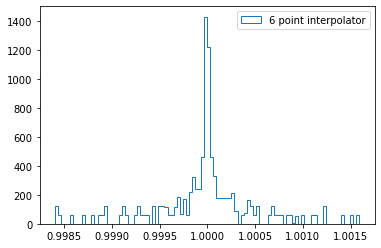

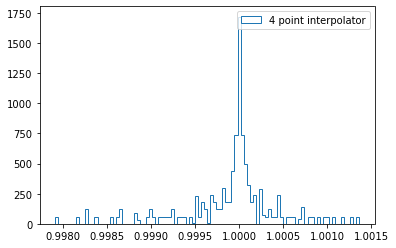

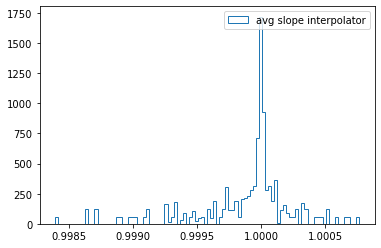

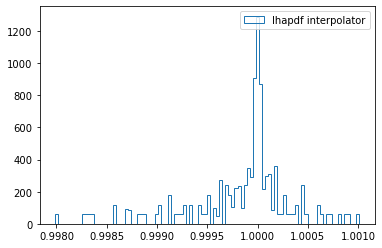

In [40]:
for i in range(0,4):
    plt.hist((data_nonend[ratio_list[i]] ), bins=100, histtype="step", label = labels[i])
    plt.legend()
    plt.show()

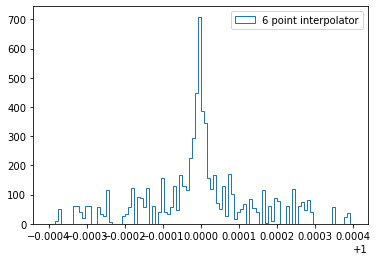

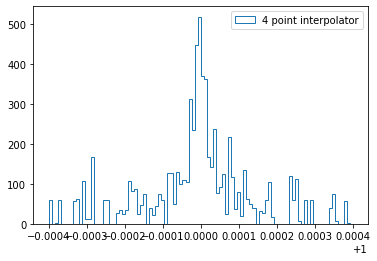

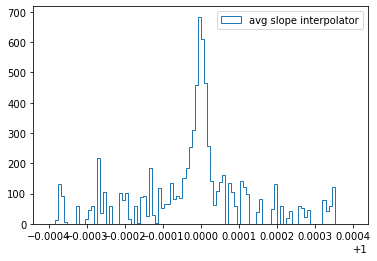

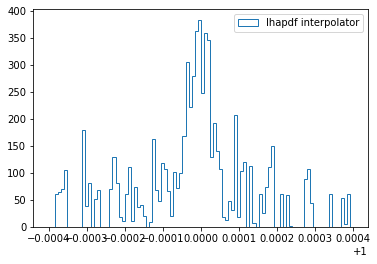

In [41]:
for i in range(0,4):
    plt.hist((data_nonend[ratio_list[i]] ), bins=100, histtype="step", label = labels[i], range = (0.9996,1.0004))
    plt.legend()
    plt.show()

# All we need


### Here we show the max deviation of the ratio of the interpolator/actual function, in both directions (i.e. above and below 1)

In [42]:
print("format : interpolator : max deviation above 1 and max deviation below 1")
for i in range(0,4):
    print("for ",labels[i],"is",  f"{data_nonend[ratio_list[i]].max() -1:.6f}",",", f"{1 -data_nonend[ratio_list[i]].min():.6f}")
#     print("max deviation below 1 for ",labels[i],"is",1 -data_nonend[ratio_list[i]].min())

format : interpolator : max deviation above 1 and max deviation below 1
for  6 point interpolator is 0.001591 , 0.001598
for  4 point interpolator is 0.001362 , 0.002095
for  avg slope interpolator is 0.000767 , 0.001610
for  lhapdf interpolator is 0.001012 , 0.002015


### Standard deviation (as a measure of how much the values fluctuate)

In [43]:
# f"{var:.6f}"
for i in range(0,4):
    print(labels[i],"-",   f"{data_nonend[ratio_list[i]].std():.6f}")

6 point interpolator - 0.000534
4 point interpolator - 0.000559
avg slope interpolator - 0.000396
lhapdf interpolator - 0.000516


### mean of absolute difference of ratio and 1 for all points in dataset

In [44]:
for i in range(0,4):
    print("measure of accuracy for ",labels[i],"is", f"{np.mean(np.abs(data_nonend[ratio_list[i]] - 1)):.6f}")

measure of accuracy for  6 point interpolator is 0.000340
measure of accuracy for  4 point interpolator is 0.000355
measure of accuracy for  avg slope interpolator is 0.000253
measure of accuracy for  lhapdf interpolator is 0.000340


### relative histograms between best 3 dimensional interpolator and the 5 dimensional interpolators

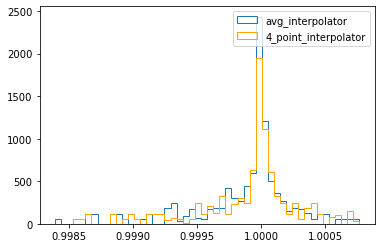

In [45]:
_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=50, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['4_point_ratio'] ), bins=bins, histtype="step",color = "orange", label = '4_point_interpolator')
# range = (0.999,1.001),
plt.legend()
plt.show()

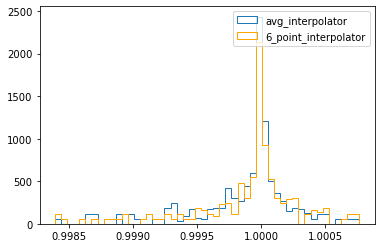

In [46]:
_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=50, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['6_point_ratio'] ), bins=bins, histtype="step",color = "orange", label = '6_point_interpolator')
# range = (0.999,1.001),
plt.legend()
plt.show()

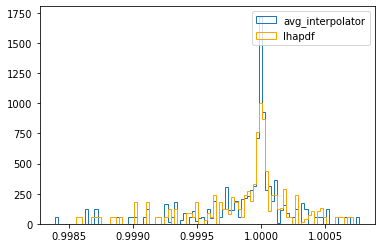

In [47]:

_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=100, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['lhapdf_ratio'] ), bins=bins, histtype="step",color = "orange", label = 'lhapdf')
# range = (0.999,1.001),
plt.legend()
plt.show()

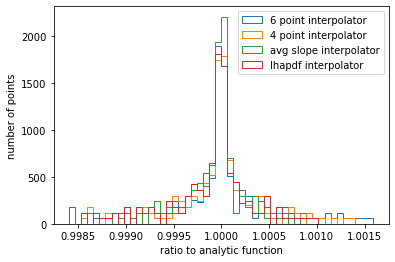

In [48]:
bins = 50
for i in range(0,4):
    _,bins,_ = plt.hist((data_nonend[ratio_list[i]] ), bins=bins, histtype="step", label = labels[i])
plt.legend()

plt.xlabel('ratio to analytic function')
plt.ylabel('number of points')
plt.show()

In [49]:
data_zero = data_nonend
for i in range(0,4):
    data_zero[ratio_list[i]] = data_zero[ratio_list[i]] - 1

<ipython-input-49-af5a75905f9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zero[ratio_list[i]] = data_zero[ratio_list[i]] - 1


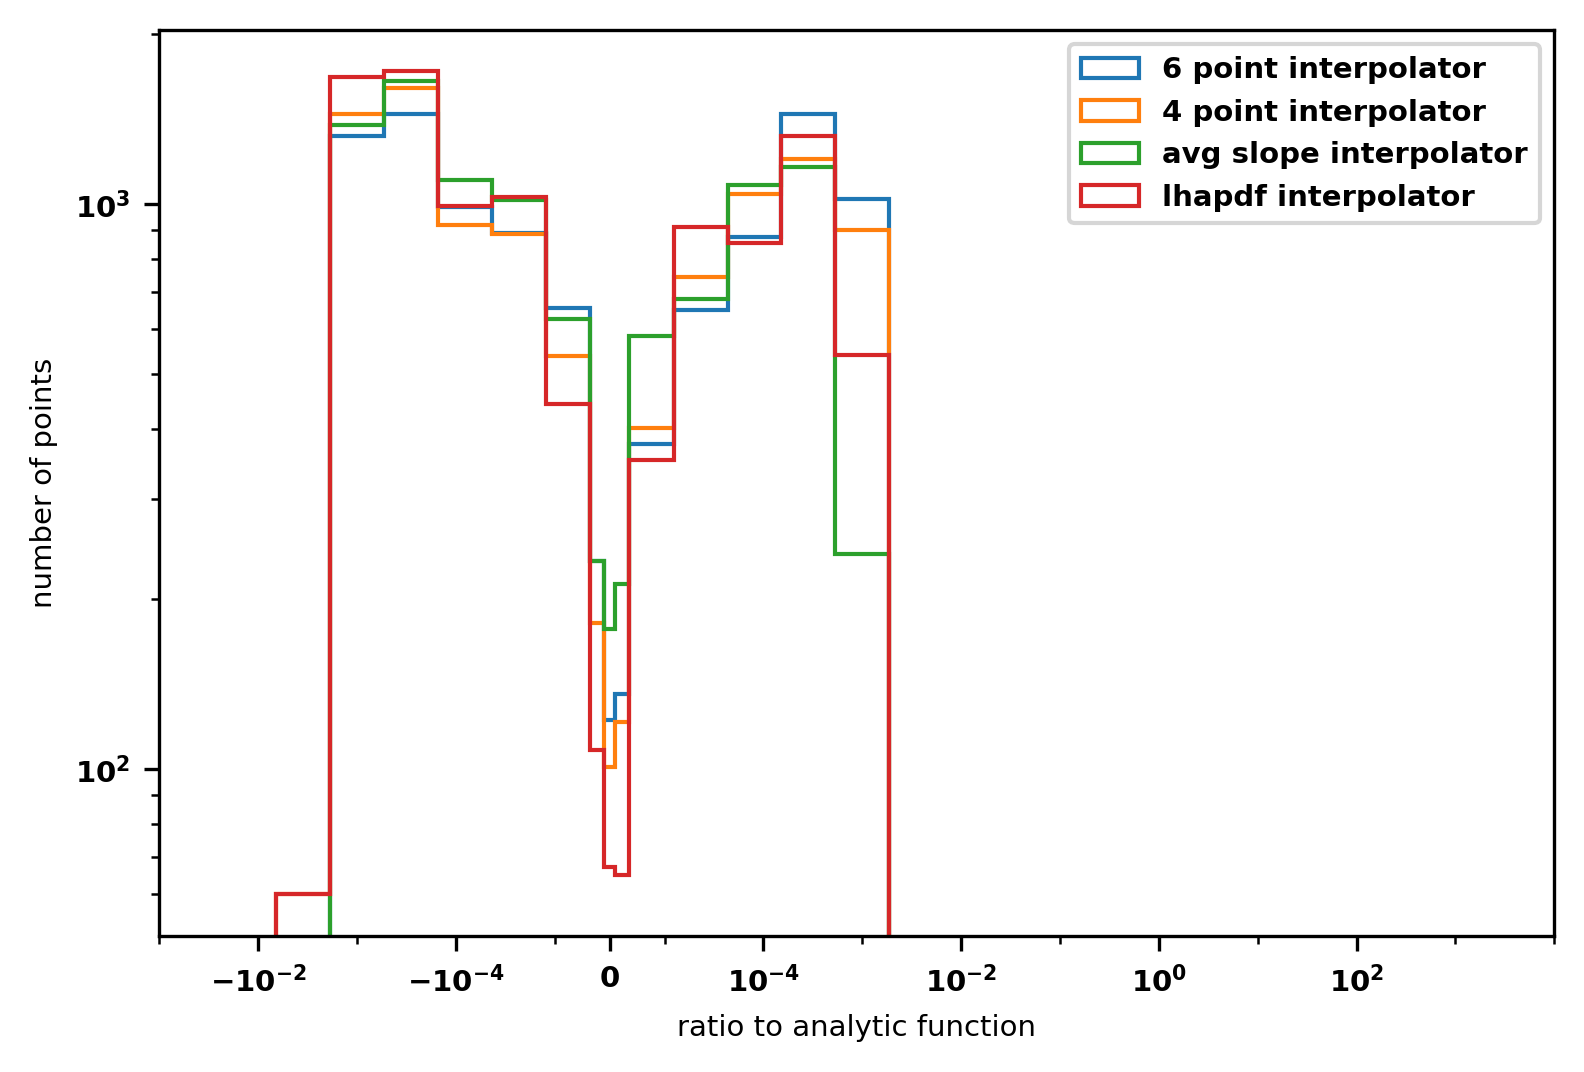

In [71]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 7}

mpl.rc('font', **font)

bins = 25
posxedges = np.logspace(-6, 0, bins//2)
# print((posxedges))
xedges = np.hstack((-np.flip(posxedges), posxedges))

for i in range(0,4):
    _,bins,_ = plt.hist((data_zero[ratio_list[i]] ), bins=xedges, histtype="step", label = labels[i], )


plt.xscale("symlog", linthresh=1e-5, linscale=0.5)
# plt.xticks([-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
plt.xticks([-1e0, -1e-2,  -1e-4, 0,  1e-4, 1e-2, 1e0, 1e2])
plt.yscale("log")
plt.xlabel('ratio to analytic function')
plt.ylabel('number of points')
plt.legend()
plt.xlim(-0.1,10000)
plt.show()